<a href="https://colab.research.google.com/github/vydra-v-getrax/ML_2023/blob/main/Homework_7_Konovalova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
wine = pd.read_csv('/content/drive/MyDrive/winemag-data-130k-v2.csv', index_col=0)

In [18]:
wine.shape

(129971, 13)

In [68]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Я скачала датасет по ссылке с kaggle, в нем 13 колонок, а не 10 ☹

Не беда, ведь мы их почистим


Точно убираем данные дегустатора, потому что они не должны быть показательными для вина

In [19]:
wine.drop(columns=['taster_name', 'taster_twitter_handle'], inplace=True)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   designation  92506 non-null   object 
 3   points       129971 non-null  int64  
 4   price        120975 non-null  float64
 5   province     129908 non-null  object 
 6   region_1     108724 non-null  object 
 7   region_2     50511 non-null   object 
 8   title        129971 non-null  object 
 9   variety      129970 non-null  object 
 10  winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 11.9+ MB


Для многих не указаны параметры designation и region_2, это сильная детализация места происхождения. Пока попробуем отказаться от этих признаков тоже, чтобы сократить число незаполненных данных

In [20]:
wine.drop(columns=['designation', 'region_2'], inplace=True)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# progress bar
from tqdm import tqdm

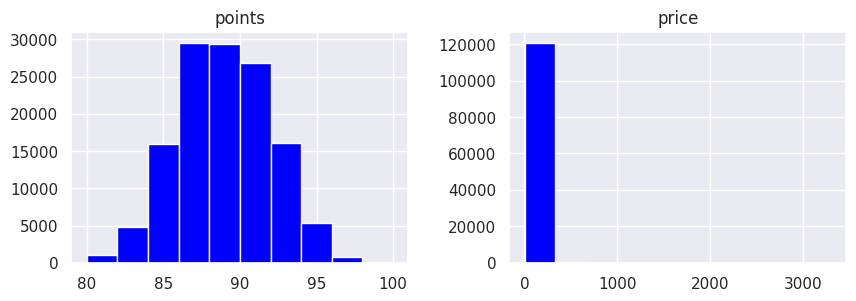

In [8]:
sns.set(rc={'figure.figsize':(10,3)})
ax=wine.hist(color='blue' )

Оценки распределены нормально

In [51]:
wine.isna().any()

country         True
description    False
points         False
price           True
province        True
region_1        True
title          False
variety         True
winery         False
dtype: bool

Почти везде есть нулевые значения. Давайте посмотрим, много ли их. 

In [73]:
wine[wine.country.isna()].shape, wine[wine.price.isna()].shape, wine[wine.province.isna()].shape, wine[wine.region_1.isna()].shape, wine[wine.variety.isna()].shape, 

((63, 9), (8996, 9), (63, 9), (21247, 9), (1, 9))

Числовые переменные (price) можно заменить на среднее значение, остальные категориальные и текстовые оставим так


In [21]:
import numpy as np


In [22]:
data = wine.copy() # сделаем копию, чтобы не портить исходники

In [23]:
data.loc[data[data.price.isna()].index, 'price'] = data.price.mean()
data.fillna('', inplace=True)

In [25]:
data.head()

,country,description,points,price,province,region_1,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,35.363389,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Douro,,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.000000,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.000000,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.000000,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [26]:
del wine

Для числовых признаков сделаем нормирование:

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data.loc[:, ['price_sc', 'points_sc']] = scaler.fit_transform(data[['price', 'points']])

In [31]:
data.head()

,country,description,points,price,province,region_1,title,variety,winery,price_sc,points_sc
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,35.363389,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.000000,-0.476076
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Douro,,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-0.514527,-0.476076
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.000000,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-0.539794,-0.476076
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.000000,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-0.565061,-0.476076
4,US,"Much like the regular bottling from 2012, this...",87,65.000000,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.748836,-0.476076


### Векторизация 

In [29]:
import nltk 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
from sklearn.preprocessing import LabelEncoder

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from nltk.stem import WordNetLemmatizer
  
from nltk.stem import PorterStemmer

porter = PorterStemmer()

STOP_WORDS = set(stopwords.words('english'))
PUNCT = string.punctuation

def preprocess(text: str) -> list:
    """Preprocess a line (sentence / full text)"""
#     lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    filtered_sentence = [porter.stem(w) for w in word_tokens if not w.lower() in STOP_WORDS]
    filtered_sentence = [w for w in filtered_sentence if w not in PUNCT]
    filtered_sentence = [w for w in filtered_sentence if not re.search('[^A-z]', w)]
    return filtered_sentence

In [32]:
from tqdm.auto import tqdm
tqdm.pandas()
data['description_prep'] = data.description.progress_apply(lambda x: ' '.join(preprocess(x)))

  0%|          | 0/129971 [00:00<?, ?it/s]

In [131]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data['description_prep'])]
 
model = Doc2Vec(documents, vector_size=10, workers=4, epochs=10)

In [33]:
from gensim.models.doc2vec import Doc2Vec

# model.save('/content/drive/MyDrive/doc2vec_wine.model')
model = Doc2Vec.load('/content/drive/MyDrive/doc2vec_wine.model')

In [34]:
data['description_doc2vec'] = [model.dv[x] for x in data.index]

In [37]:
data.to_csv('/content/drive/MyDrive/wine_data.csv')

In [38]:
# разложим доктувек
for ind, row in data.iterrows():
  for i in range(10):
    data.loc[ind, f'd2v_{i}'] = row.description_doc2vec[i]

Слишком много стран, давайте выберем топ-N, а остальные запишем как Other. Аналогично сделаем с провинциями и сортами (variety)


In [39]:
countries = data.country.value_counts()
countries = countries[countries.values > 1400].index

In [40]:
data['country'] = data.country.apply(lambda x: x if x in countries else 'Other')

In [41]:
data.country.value_counts()

US              54504
France          22093
Italy           19540
Spain            6645
Portugal         5691
Chile            4472
Argentina        3800
Austria          3345
Other            2567
Australia        2329
Germany          2165
New Zealand      1419
South Africa     1401
Name: country, dtype: int64

In [42]:
data.variety.value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Sauvignonasse                     1
Cabernet Sauvignon-Barbera        1
Meseguera                         1
Forcallà                          1
Bobal-Cabernet Sauvignon          1
Name: variety, Length: 708, dtype: int64

In [49]:
varieties = data.variety.value_counts()
varieties = varieties[varieties.values > 800].index

In [50]:
data['variety'] = data.variety.apply(lambda x: x if x in varieties else 'Other')

In [51]:
data.variety.value_counts()

Other                         24817
Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                       

In [52]:
province = data.province.value_counts()
province = province[province.values > 1000].index

In [53]:
data['province'] = data.province.apply(lambda x: x if x in province else 'Other')

С регионами пока неудобно:

In [194]:
regions = data.region_1.value_counts()
regions = regions[regions.values > 1000].index

In [196]:
data[~data.region_1.isin(regions)].shape

(71524, 39)

Какой порог ни возьми, слишком большое разнообразие для категорий.

Получим категориальные переменные one-hot энкодингом

In [54]:
df = pd.get_dummies(data.country, prefix='country')
data = data.merge(df, left_index=True, right_index=True)

In [55]:
df = pd.get_dummies(data.variety, prefix='variety')
data = data.merge(df, left_index=True, right_index=True)

In [56]:
df = pd.get_dummies(data.province, prefix='province')
data = data.merge(df, left_index=True, right_index=True)

In [57]:
data.head(1)

,country,description,points,price,province,region_1,title,variety,winery,price_sc,...,province_Piedmont,province_Provence,province_Rhône Valley,province_Sicily & Sardinia,province_South Australia,province_Southern Italy,province_Southwest France,province_Tuscany,province_Veneto,province_Washington
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,35.363389,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.0,...,0,0,0,1,0,0,0,0,0,0


Не хочется оставлять много текстовых признаков, давайте пока уберем также титулы. Названия виноделен тоже довольно разнообразные, давайте их тоже не возьмем

In [58]:
data.drop(columns=['country', 'description', 'title', 'region_1',  'winery', 'points', 'price',  'variety', 'province', 'description_prep', 'description_doc2vec'], inplace=True)

In [59]:
data.head(1)

,price_sc,points_sc,d2v_0,d2v_1,d2v_2,d2v_3,d2v_4,d2v_5,d2v_6,d2v_7,...,province_Piedmont,province_Provence,province_Rhône Valley,province_Sicily & Sardinia,province_South Australia,province_Southern Italy,province_Southwest France,province_Tuscany,province_Veneto,province_Washington
0,0.0,-0.476076,-0.094377,-0.154301,0.112871,0.058257,0.118901,-0.020743,0.026054,0.113928,...,0,0,0,1,0,0,0,0,0,0


In [60]:
data.to_csv('/content/drive/MyDrive/wine_data.csv')

<Axes: >

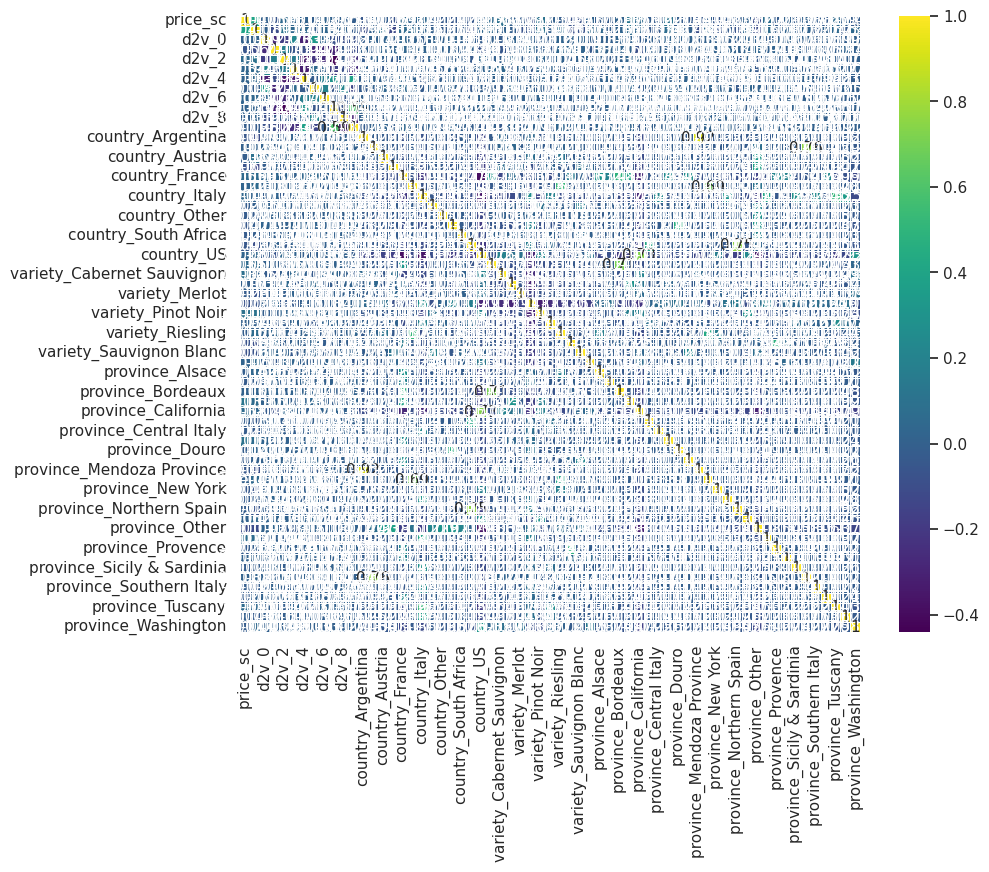

In [219]:
corr = data.corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr, linewidths=.5, cmap='viridis', annot=True,annot_kws={"size": 11})

Ой. Посмотрим выборочно

<Axes: >

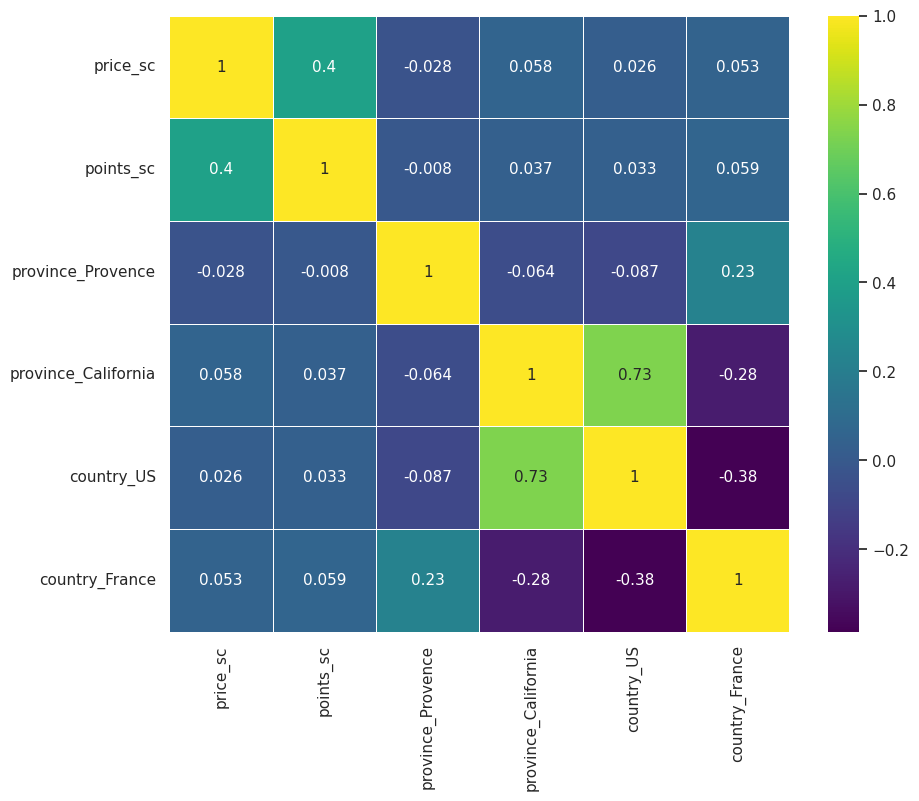

In [66]:
corr = data[['price_sc', 'points_sc', 'province_Provence', 'province_California', 'country_US', 'country_France']].corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr, linewidths=.5, cmap='viridis', annot=True,annot_kws={"size": 11})

Коррелирует провинция Калифорния и страна Америка, логично. Интересно, что Прованс с Францией коррелирует значительно меньше (вероятно, много незаполненных данных).
Можно выкинуть страны либо провинции, но пока оставим всё, но примем к сведению

Получилось все еще довольно много признаков, попробуем уменьшить размерность


In [67]:
from sklearn.decomposition import PCA
pca_2 = PCA(2) # задали количество компонент

pca_2_result = pca_2.fit_transform(data) 

pca_2_result.shape # массив длиной в кол-во строк датасета и шириной по числу компонент

(129971, 2)

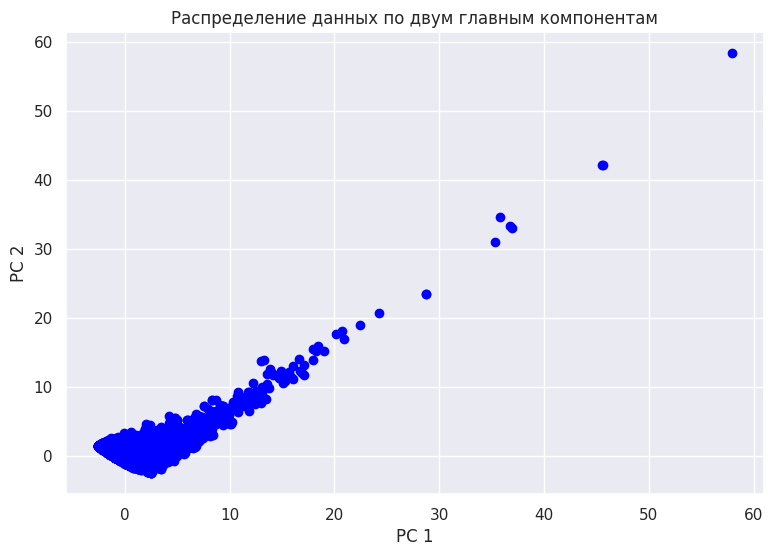

In [68]:
sns.set(rc={'figure.figsize':(9,6)},font_scale=1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='blue') # 0 и 1 - индексы колонок
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Распределение данных по двум главным компонентам')
plt.show()

Как-то они отвратительно сгруппировались возле нуля, не распределяясь по компонентам. Наверно, неудачно подобраны признаки

In [70]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters = 5,
               init='k-means++', 
               n_init=15,
               max_iter=500, 
               random_state=17
    ) 
    
kmeans.fit(pca_2_result)
print(kmeans.inertia_)


69072.24813933209


Учитывая, что инерция - это сумма квадратов ошибок, ошибок тут больше, чем качества. Попробуем поменять количество кластеров:

In [73]:
from sklearn.metrics import silhouette_score

inertia = []
silhouette = {}
for i in tqdm(range(2,20)):
    
    kmeans = cluster.KMeans(
               n_clusters=i, 
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17
    ) 
    
    
    kmeans.fit(pca_2_result)
    print('inertia')
    inertia.append(kmeans.inertia_)
    print("silhouette")
    silhouette[i] = silhouette_score(pca_2_result, kmeans.labels_, metric='euclidean')


  0%|          | 0/18 [00:00<?, ?it/s]

inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette
inertia
silhouette


In [78]:
with open('/content/drive/MyDrive/kmeans.txt', 'w', encoding='utf8') as f:
  for k, v in silhouette.items():
    f.write(str(k) + '\t' + str(v) + '\n')

In [74]:
for n_cl, v in enumerate(inertia):
  print(n_cl+2, v)

2 159701.02137944195
3 112354.66035921115
4 86862.69778894639
5 69072.24813933209
6 54403.81315763589
7 45290.22413686411
8 39241.40315613927
9 34348.4049442028
10 30884.491210409622
11 27576.007809145674
12 25290.908494825395
13 23092.316502256013
14 21016.721793744502
15 19491.040525532502
16 18459.0232002188
17 17263.54091093941
18 16228.606690980125
19 15452.647426464371


Возьмем максимальное число кластеров -- 19

In [75]:
for k, v in silhouette.items():
  print(k, v)

2 0.4721289076599206
3 0.47885026324591096
4 0.40837283282989645
5 0.4081088311888125
6 0.4034513728625328
7 0.38729228064458454
8 0.3853435822090014
9 0.40181182009149496
10 0.37304850967529724
11 0.36346325024737947
12 0.37544244311401626
13 0.37834070193646346
14 0.37601688664124155
15 0.3788513229197865
16 0.3778524730271491
17 0.3783022696194995
18 0.3817263137620606
19 0.38727183396535486


In [79]:
kmeans = cluster.KMeans(n_clusters=19,random_state=17,init='k-means++')

kmeans_labels = kmeans.fit_predict(pca_2_result)
# вычисляем центры кластеров и предугадываем номер кластера для каждого семпла данных

centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


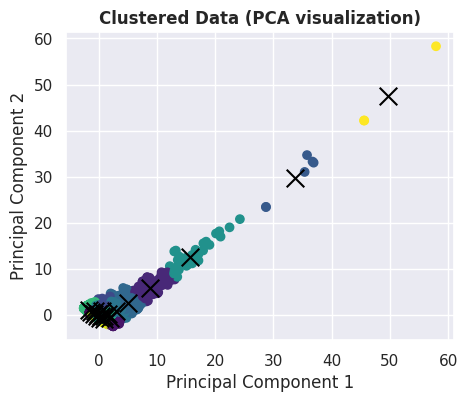

In [80]:
sns.set( rc={'figure.figsize':(5,4)},font_scale=1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=160, color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# добавить легенду

plt.title('Clustered Data (PCA visualization)',fontweight='bold')

plt.show()

In [82]:
data['Cluster_Kmeans']=kmeans_labels

Визуализация для качества работы KMeans:

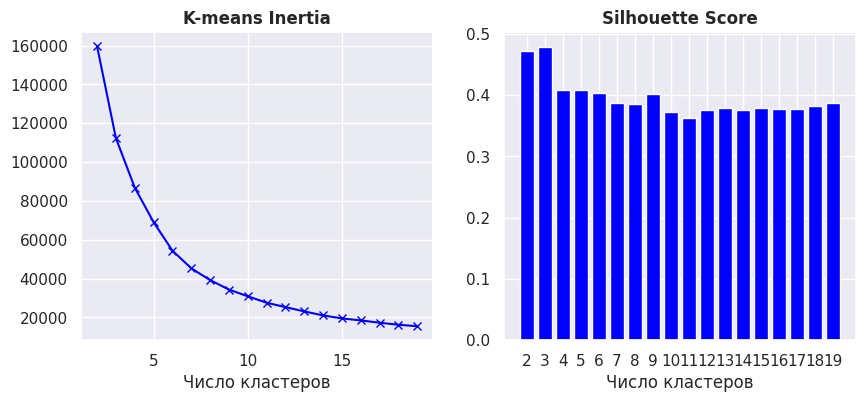

In [81]:
sns.set(font_scale=1, rc={'figure.figsize':(10,4)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='x',color='blue') 

plt.xlabel('Число кластеров')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2) 

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'blue')
plt.xticks(range(len(silhouette)), list(silhouette.keys())) 
plt.grid(True)
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Число кластеров')


plt.show()

In [84]:
data.Cluster_Kmeans

0         14
1         16
2         16
3         16
4          4
          ..
129966    10
129967    11
129968    10
129969    10
129970    10
Name: Cluster_Kmeans, Length: 129971, dtype: int32

Второй способ кластеризации

In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/wine_data.csv')

In [ ]:
from sklearn.cluster import MeanShift

cluster = MeanShift(cluster_all=False, bandwidth=3.5)
cluster.fit(data)
# labels = cluster.predict(data)

In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient: %0.3f" % silhouette_score(data, cluster.labels_ ))


In [ ]:
data['Cluster_']=cluster.labels


In [13]:
cluster.labels_


array([-1, -1, -1, ..., -1, -1, -1])

В целом можно сказать, что кластеры получились не очень удачными. С одной стороны, об этом говорят низкие метрики. С другой стороны, качественная оценка также низкая. К примеру, методом k_means в общий кластер 16 попадают объекты 1, 2, 3, которые, на первый взгляд, не должны быть объединены (португальское красное, калифорнийское пино гриджио и американский рислинг).

Я уверена, что основа успеха здесь лежит не столько в подборе оптимального способа кластеризации, сколько в долгой тщательной работе с признаками. Так, среди текстовых признаков я не использовала названия продуктов. Предполагаю, что наиболее эффективным использованием будет распарсить эти названия и извлечь из них общие слова, приведенные к начальной форме. Например, там часто дублируется информация о сорте \ регионе, в таком случае эти коррелирующие признаки можно будет убрать. 
Для сокращения размерности и скорости работы алгоритмов я объединила все малопредставленные регионы, страны и сорта в классы "other". Конечно, если не делать этого, кластеризация будет более точной.
С другой стороны, можно предположить, что большинство использованных признаков (текст описания, распределение по регионам) было избыточным. Можно было бы использовать исключительно признаки, например, страны и цены — в таком случае, скорее всего, были бы довольно прозрачные и точные кластеры. 

Подводя итог, основа любой работы с данными - это ~~работа с данными~~ обработка исходных данных и подготовка фичей. Кроме того, мне не хватило понимания цели кластеризации, а конкретное тз и знание предметной области помогло бы понять направление работы и грамотнее выбрать фичи. 

